![alt text](izo/dst-3-unit-1-mod-14-3.png)

В прошлых модулях мы неоднократно говорили о важности предобработки данных и даже приводили основные этапы предобработки. В этом модуле мы продолжим эту тему и рассмотрим очистку данных, которая включает в себя следующие этапы:

- Работа с пропущенными значениями.
- Очистка данных от выбросов.
- Удаление признаков и записей, которые не несут полезной информации.

### Что кроется под термином «очистка данных»?

Очистка данных (**data cleaning**) — это процесс обнаружения и удаления (или исправления) **повреждённых**, **ложных** или **неинформативных** записей таблицы или целой базы данных. Процесс состоит из двух этапов: *поиск* и *ликвидация* (или редактир*ование).

Цель очистки данных — избавиться от «мусора», который может помешать моделированию или исказить его результаты. Во многих задачах очистка данных — это самая главная часть этапа подготовки данных к построению модели, которая нередко занимает большую часть времени работы над задачей.

Сложность очистки и, соответственно, время, затраченное на неё, зависят от сложности задачи и размера данных. Чем больше у вас источников данных, тем больше вероятность того, что необходимо будет проводить тщательную очистку. 

Время, которое специалист тратит на очистку, довольно индивидуально и зависит ещё и от его навыков. В среднем при работе с данными оно занимает около 40-60 % от общего времени работы с данными (включая построение модели).

Нередко оказывается так, что начинающие специалисты пропускают этот этап, сразу переходя к построению своей сложной нейронной сети с невероятно сложной архитектурой и современными наворотами. Однако в результате есть риск столкнуться либо с ошибкой выполнения кода, либо переобученной под «мусор» моделью, предсказания которой мало сопоставимы с действительностью. 

### Вспомните поговорку: «мусор на входе — мусор на выходе».

Рассмотрим пример того, как «мусор» может влиять на результат. На графиках ниже представлены две диаграммы рассеяния и две одинаковые линейные модели (прямые, которые пытаются повторить данные). На левом графике модель построена на «грязных» данных, содержащих аномалии, а на правом модель обучена на очищенных данных. 

![alt text](izo/dst-3-unit-1-mod-14-4.png)

*Нетрудно заметить, как сильно аномалии влияют на результат моделирования и искажают его. Вторая прямая более точно описывает зависимость, нежели первая, хотя разница в данных составляет лишь пять исключённых из рассмотрения наблюдений.*

Наша с вами беда состоит в том, что реальные данные почти всегда «грязные». В бизнес-задачах данные чаще всего представляют собой неструктурированный набор таблиц, в которых содержится куча всевозможного «мусора». 

Представьте, что мы пытаемся построить чудо-модель, которая поможет нам определить оптимальные пути развития нашей небольшой компании. Для этого нам понадобятся данные из многих отделов, и все они будут представлены разными форматами: данные об активности пользователей на сайте — в виде json-формата, для данных из бухгалтерии типичен формат excel, данные о показателях развития мы достанем из базы данных. 

На руках у нас будет куча таблиц в разных форматах, которые необходимо грамотно объединить. Но и это — не наша главная проблема. 

Для того чтобы «состряпать» большой и полезный датасет, необходимо отдельно обработать каждую из таблиц. В данных будет огромное количество «мусора»: начиная с несовпадающих периодов наблюдений (компания открылась раньше, чем её сайт), наименований категорий (различные названия отделов в каждой из таблиц) и пропущенных данных (мы могли потерять их в процессе выгрузки из базы), заканчивая некорректно введёнными значениями с парой лишних или недостающих нулей, которые по случайности вбила условная бухгалтер Алевтина Петровна. 

Этот модуль даст вам знания и навыки, которые помогут справиться с типичными проблемами «грязных данных» и не растеряться, когда вы впервые с ними столкнётесь. Мы индивидуально обсудим каждую проблему и приведём несколько техник поиска её обнаружения и устранения.

### Цели модуля:

- Рассмотреть методы определения пропусков в данных и основные методики работы с ними.
- Познакомиться с методами поиска выбросов в данных и рассмотреть основные практики работы с ними.
- Научиться определять дубликаты и неинформативные признаки в данных и избавляться от них.

*В этом модуле мы с вами будем работать с данными с самого настоящего соревнования на платформе Kaggle, инициатором которого стал Сбер. Соревнование проводилось в 2017 году, его призовой фонд составил 25 000 $. Требования Сбера состояли в построении модели, которая бы прогнозировала цены на жильё в Москве, опираясь на параметры самого жилья, а также состояние экономики и финансового сектора в стране.*

Датасет представляет собой набор данных из таблицы с информацией о параметрах жилья (train.csv). В ней содержатся 292 признака о состоянии экономики России на момент продажи недвижимости (macro.csv). 

Для упрощения техники очистки данных мы будем отрабатывать на урезанном датасете.

Скачать набор данных в формате csv (разделитель — ',') можно [здесь](https://lms-cdn.skillfactory.ru/assets/courseware/v1/fbb2e41c55afd1333f7f87e91e904e9f/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/sber_data.zip) (csv-файл находится в zip-архиве — распакуйте архив, прежде чем продолжать работу!)

Он содержит информацию о 61 признаке. Их значение мы будем объяснять в процессе работы с данными.

Импортируем библиотеки, которые нам понадобятся (pandas для работы с данными, numpy для математических преобразований, matplotlib и seaborn для визуализации):

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Прочитаем наши данные и выведем первые пять строк таблицы с помощью head(), чтобы убедиться в том, что всё подгрузилось верно:

sber_data = pd.read_csv('data/sber_data.csv')
sber_data.head()

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,0,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,0,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,poor,0,5700000
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,...,0.934273,0.892674,0.236455,1.031777,1.561505,16.990677,16.041521,good,0,13100000
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,excellent,0,16331452


In [3]:
# Дополнительно посмотрим на последние пять строк таблицы с помощью tail():

display(sber_data.tail())

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
30466,30469,44,27.0,7.0,Otradnoe,5088.0,4,12721.0,4,0,...,1.103579,0.167718,0.349899,1.235066,0.612359,7.482165,4.836787,good,0,7400000
30467,30470,86,59.0,3.0,Tverskoe,1874.0,4,6772.0,4,1,...,0.069986,0.086552,0.362681,0.850385,0.310021,0.778428,1.450108,poor,0,25000000
30468,30471,45,NaN,10.0,Poselenie Vnukovskoe,NaN,0,NaN,0,0,...,4.338453,1.339078,1.234235,1.192543,1.186621,13.459593,9.890758,no data,0,6970959
30469,30472,64,32.0,5.0,Obruchevskoe,2372.0,6,6083.0,8,0,...,1.204798,1.340017,0.130667,1.644053,0.476021,2.088193,4.119706,satisfactory,0,13500000
30470,30473,43,28.0,1.0,Novogireevo,2215.0,4,5824.0,4,0,...,2.108265,0.825811,0.378950,0.480531,0.867332,0.688707,0.127867,poor,0,5600000


### Давайте проведём небольшой разведывательный анализ, чтобы понять, с чем мы работаем

In [4]:
# Чему равно число строк в таблице?

sber_data.shape[0]

30471

In [6]:
# Сколько районов Москвы и Московской области представлено в данных?

sber_data['sub_area'].describe()

count                   30471
unique                    146
top       Poselenie Sosenskoe
freq                     1776
Name: sub_area, dtype: object

In [8]:
# Чему равна максимальная цена квартир (price_doc)? Введите это число полностью, без округлений.
# Присмотритесь к нему — не кажется ли оно вам странным? Мы к нему ещё вернемся :)

sber_data['price_doc'].describe()

count    3.047100e+04
mean     7.123035e+06
std      4.780111e+06
min      1.000000e+05
25%      4.740002e+06
50%      6.274411e+06
75%      8.300000e+06
max      1.111111e+08
Name: price_doc, dtype: float64

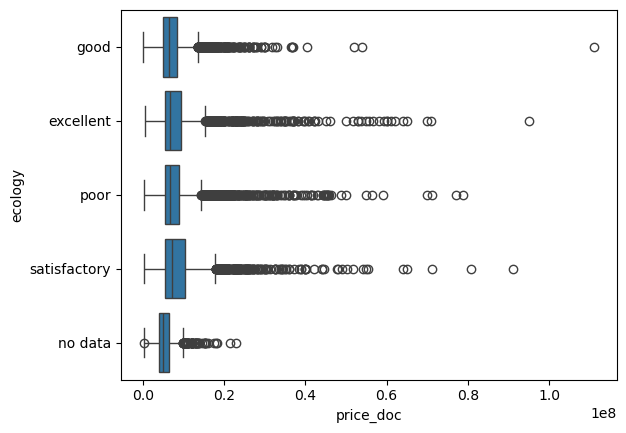

In [9]:
# Проверим, влияет ли уровень экологической обстановки в районе на цену квартиры. 
# Постройте коробчатую диаграмму цен на квартиры (price_doc) 
# в зависимости от уровня экологической обстановки в районе (ecology). 
# Какой уровень ценится на рынке меньше всего?

ax_acology = sns.boxplot(sber_data,
                         x='price_doc',
                         y='ecology')

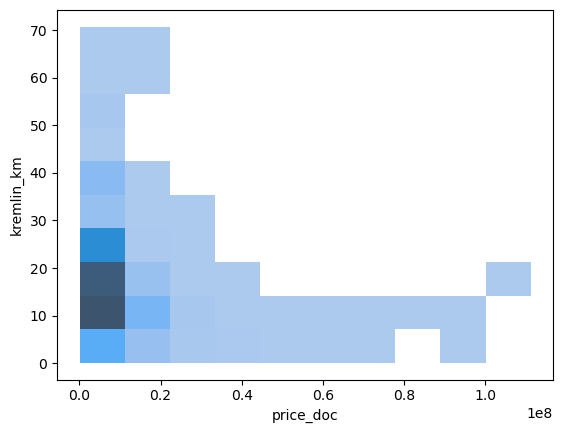

In [14]:
# Постройте диаграмму рассеяния, которая покажет, как цена на квартиру (price_doc) 
# связана с расстоянием до центра Москвы (kremlin_km). 
# Выберите все верные утверждения.

ax_kremlin = sns.histplot(sber_data,
                          x='price_doc',
                          y='kremlin_km',
                          bins=10)